##K-Means Clustering Model

In [4]:
#Import all the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Load  or create a dataset
df = pd.read_csv('customer_data_records.csv')

# data = {
#     'Customer ID': [1, 2, 3, 4, 5,6, 7, 8, 9, 10],
#     'Annual_Income_(USD$)': [15,16, 17, 18, 19, 80,85, 86,87,88],
#     'Spending_Score_(1-100)': [38, 81, 6, 77, 40,76,94,3,72,14],
# }

# df = pd.DataFrame(data)
# print(df)

df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,117,20
1,2,107,59
2,3,29,36
3,4,121,19
4,5,86,90


In [3]:
#select the features for clustering
X = df.iloc[:, [1, 2]].values

In [6]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

Text(0.5, 0, 'Number of Clusters')

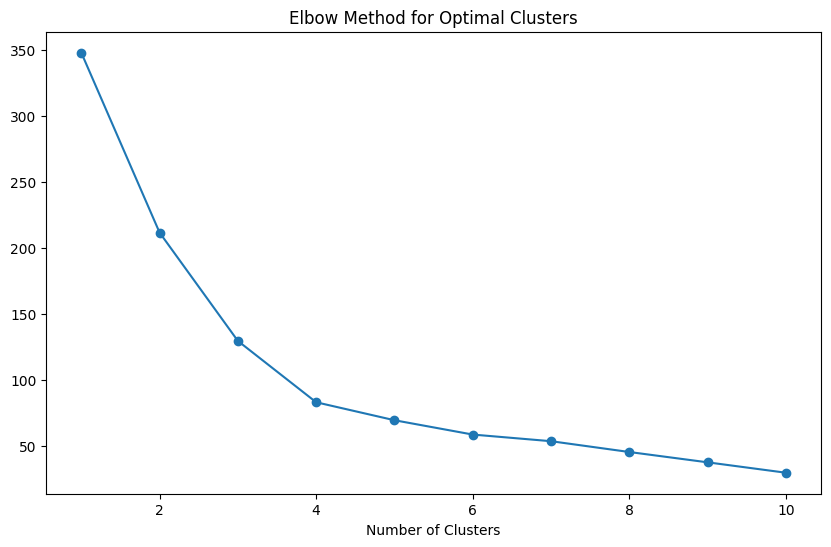

In [9]:
#plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')    

In [10]:
optimal_clusters = 5

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [17]:
#Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_
print(df)

     CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1                 117                      20        0
1             2                 107                      59        3
2             3                  29                      36        4
3             4                 121                      19        0
4             5                  86                      90        3
..          ...                 ...                     ...      ...
169         170                 111                      76        3
170         171                 138                      87        3
171         172                  84                      15        2
172         173                 107                      92        3
173         174                  17                      98        1

[174 rows x 4 columns]


In [18]:
#predict the clusters
y_kmeans = kmeans.predict(X_scaled)

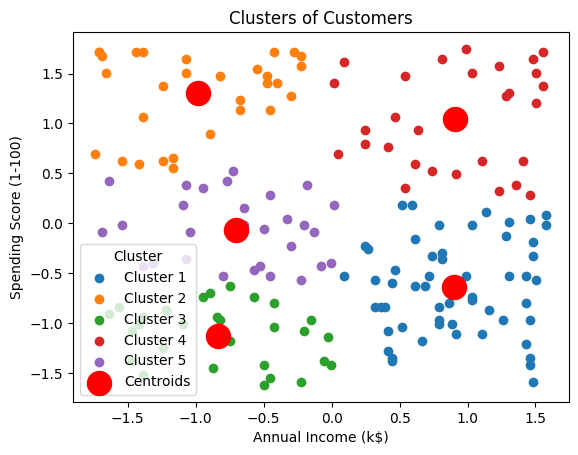

In [19]:
#plot each cluster with different color using a for loop
for i in range(optimal_clusters):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Customers') 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()